# Explore here

In [26]:
import os
import psycopg2
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# 1) Connect to the database here using the SQLAlchemy's create_engine function
#con_str = "postgresql://gitpod:postgres:@localhost/milser_pg"
global engine # This allows us to use a global variable called engine
# A "connection string" is basically a string containing all database credentials together.
#connection_string = f"dbname={os.getenv('DB_NAME')} user={os.getenv('DB_USER')} password={os.getenv('DB_PASSWORD')} host={os.getenv('DB_HOST')}"

#engine = create_engine(connection_string)
#Session = sessionmaker(bind=engine,autocommit=False) 

# Ruta del directorio del script
#script_dir = os.path.dirname(__file__)  # Obtiene la ruta del directorio actual del script
cwd = '%pwd'
script_dir = os.path.abspath(cwd)
# Construir la ruta al archivo CSV
relative_path = os.path.join("data", "raw", "AB_NYC_2019.csv")
absolute_path = os.path.abspath(os.path.join(script_dir, relative_path))
#path=("../../Proyecto-de-Preprocesamiento-de-Datos/data/raw/AB_NYC_2019")

# Leer el archivo CSV
total_data_raw = pd.read_csv(r"C:\Users\milser\Documents\Trasteo_4geeks\Logistic-Regression-Project-Tutorial\data\raw\bank-marketing-campaign-data.csv",delimiter=';')
total_data = total_data_raw
total_data_raw.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
total_data.shape

(41188, 21)

El dataset tiene 41188 instanias con 21 variables, de estas vamosa a centrarnos en Y que utilizaremos para determinar el exito que ha tenido un apartamento.

#### Limpieza de datos

In [8]:
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No hay valores nulos, por lo que no desechamos ninguna fila por este motivo.

In [27]:
#total_data.drop("host_id", axis = 1).duplicated().sum()

total_data.drop(["pdays","poutcome"], axis = 1, inplace = True)
total_data.head()
#total_data['education'].value_counts()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no


Asumo que no hay dupolicados porque cada linea es una solicitud distinta, aunque sea de un mismo cliente

In [31]:

def save_duplicates_to_excel(data, columns, folder_path):
    for column in columns:
        # Seleccionar la columna actual y su correspondiente con la terminación '_n'
        current_column = column
        numeric_column = f"{column}_n"

        data[numeric_column] = pd.factorize(data[column])[0]
        # Convertir la columna numérica a tipo decimal
        data[numeric_column] = data[numeric_column].astype(float)

        # Guardar los datos únicos en un DataFrame y luego escribirlos en un archivo Excel
        unique_data = data.drop_duplicates([column, numeric_column])[[column, numeric_column]]
        file_path = folder_path + f"\\{column}.xlsx"
        unique_data.to_excel(file_path, index=False)

non_numeric_columns = total_data.select_dtypes(exclude=['number']).columns.tolist()
printable_columns = total_data.columns.difference(non_numeric_columns)
printable_columns

#Selecciono las columnas que tienen algo no numerico, por lo que querremos categorizarlo
non_numeric_columns = total_data.select_dtypes(exclude=['number']).columns.tolist()
#Estas columnas son las que tienen SOLO numeros
printable_columns = total_data.columns.difference(non_numeric_columns)

columns = non_numeric_columns
folder_path = r"C:\Users\milser\Documents\Trasteo_4geeks\Logistic-Regression-Project-Tutorial\data\raw"
# Llamar a la función para guardar los datos únicos en archivos Excel
save_duplicates_to_excel(total_data, columns, folder_path)
total_data.head(50).to_excel(r"C:\Users\milser\Documents\Trasteo_4geeks\Logistic-Regression-Project-Tutorial\data\raw\with_factors.xlsx", index = False)


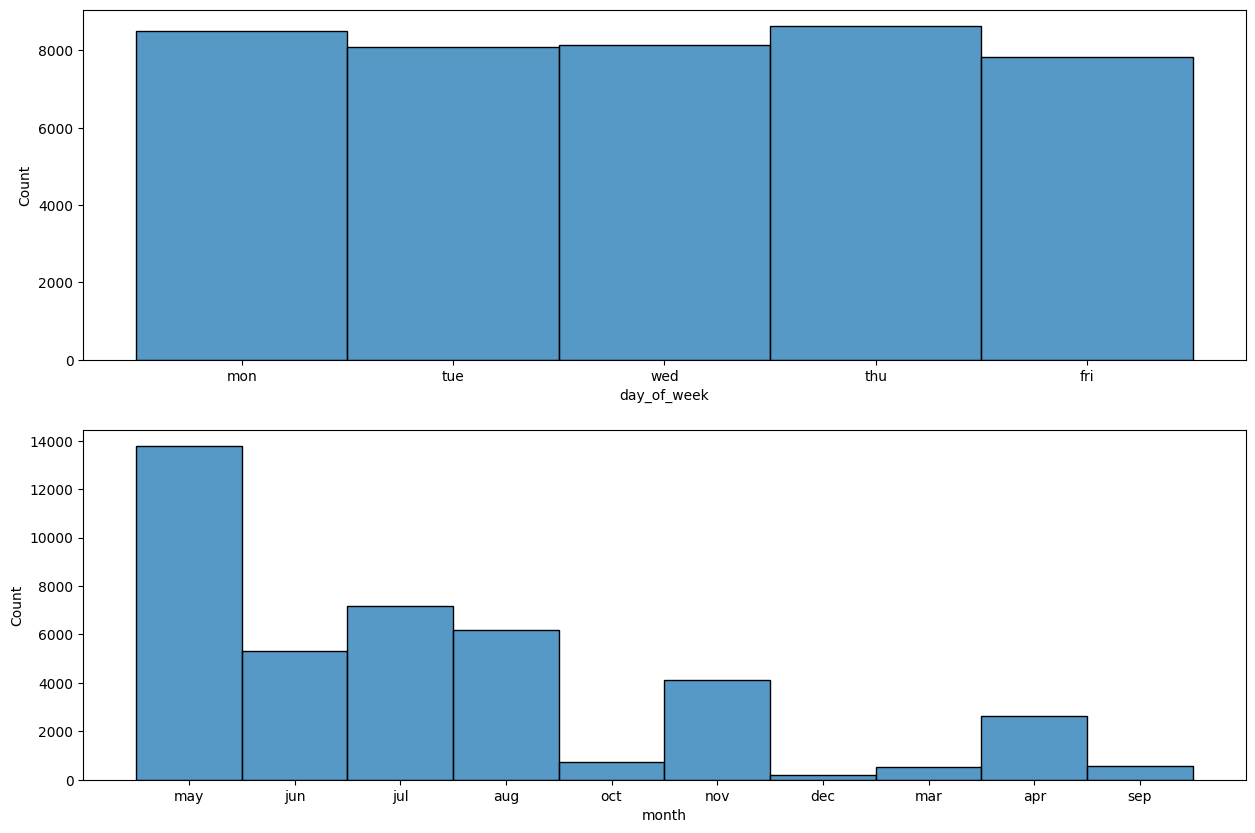

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,1, figsize = (15, 10))

sns.histplot(total_data, x = "day_of_week", ax = axis[0])
sns.histplot(total_data, x = "month", ax = axis[1])


plt.show()

##### Graficos categoricos

Aqui podemos ver como 


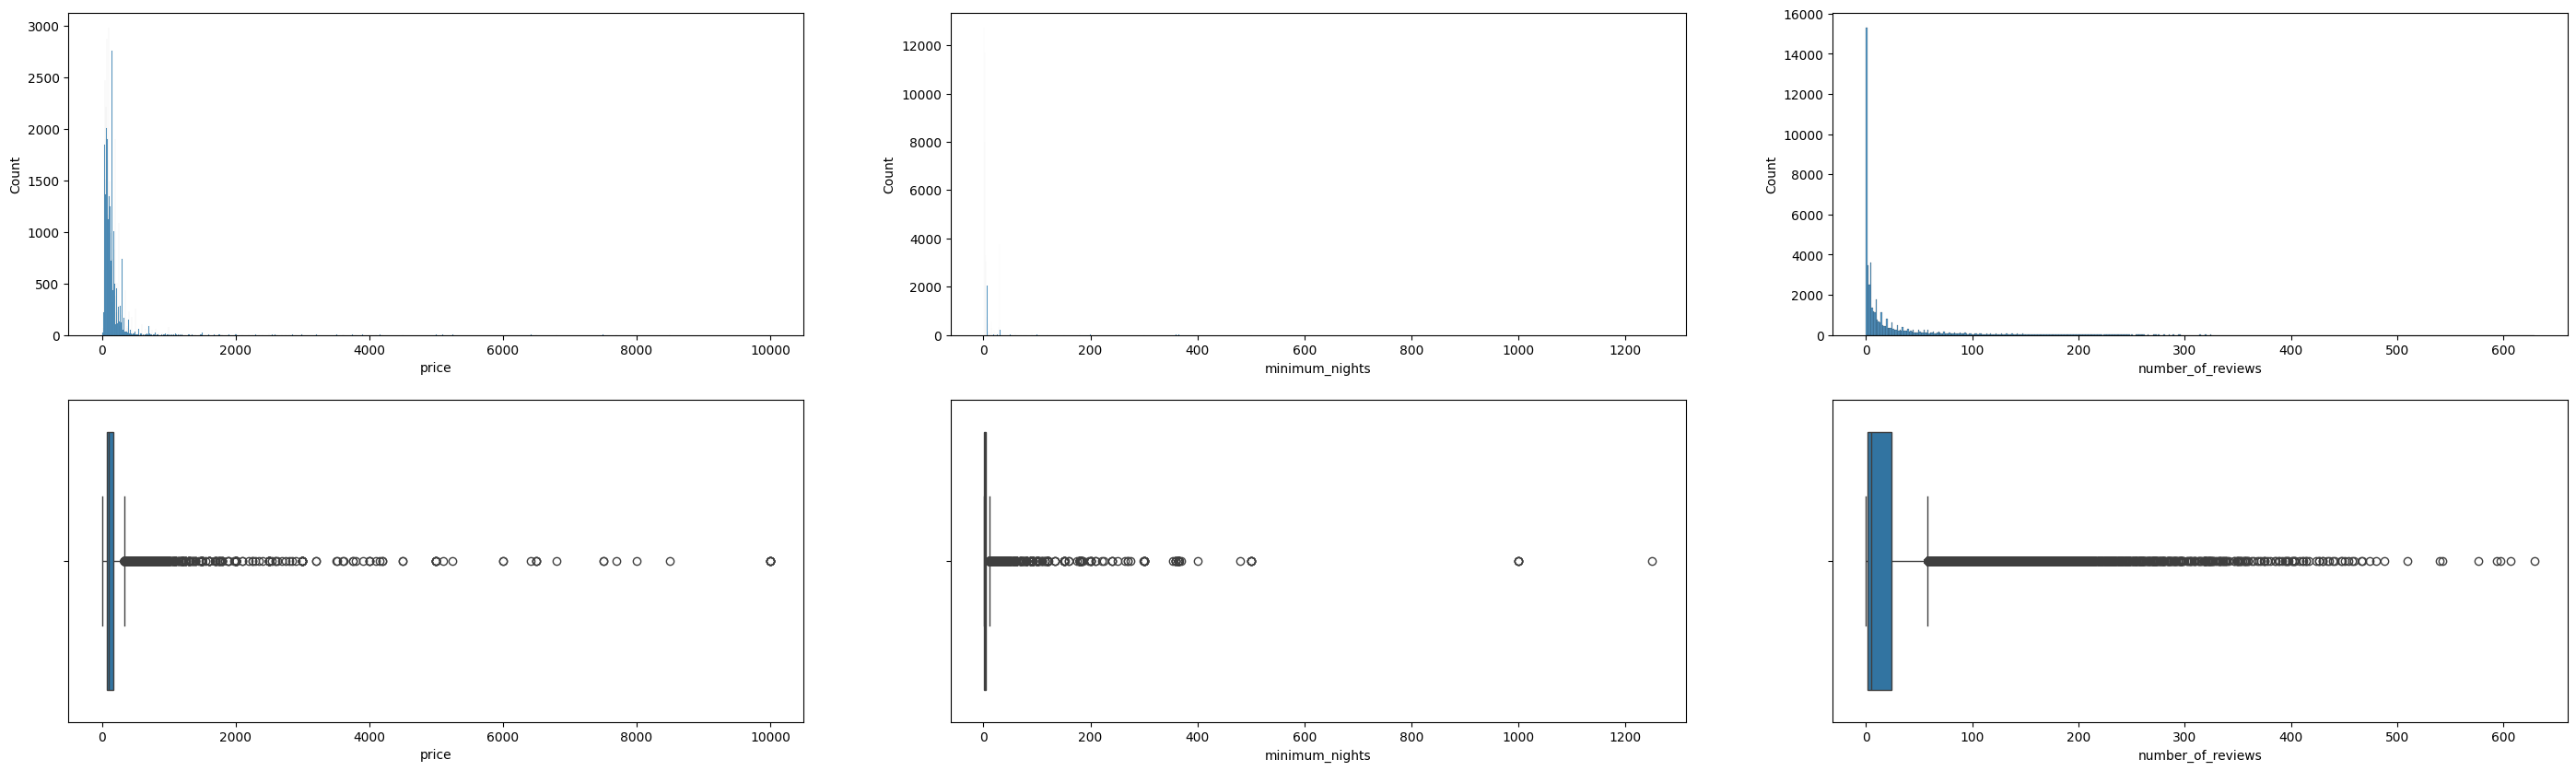

In [11]:
fig, axis = plt.subplots(2, 2, figsize = (35, 10))

sns.histplot(total_data, x = "price", ax = axis[0, 0])
sns.boxplot(total_data, x = "price", ax = axis[1, 0])

sns.histplot(total_data, x = "minimum_nights", ax = axis[0, 1])
sns.boxplot(total_data, x = "minimum_nights", ax = axis[1, 1])

sns.histplot(total_data, x = "number_of_reviews", ax = axis[0, 2])
sns.boxplot(total_data, x = "number_of_reviews", ax = axis[1, 2])






plt.show()

<Axes: xlabel='calculated_host_listings_count'>

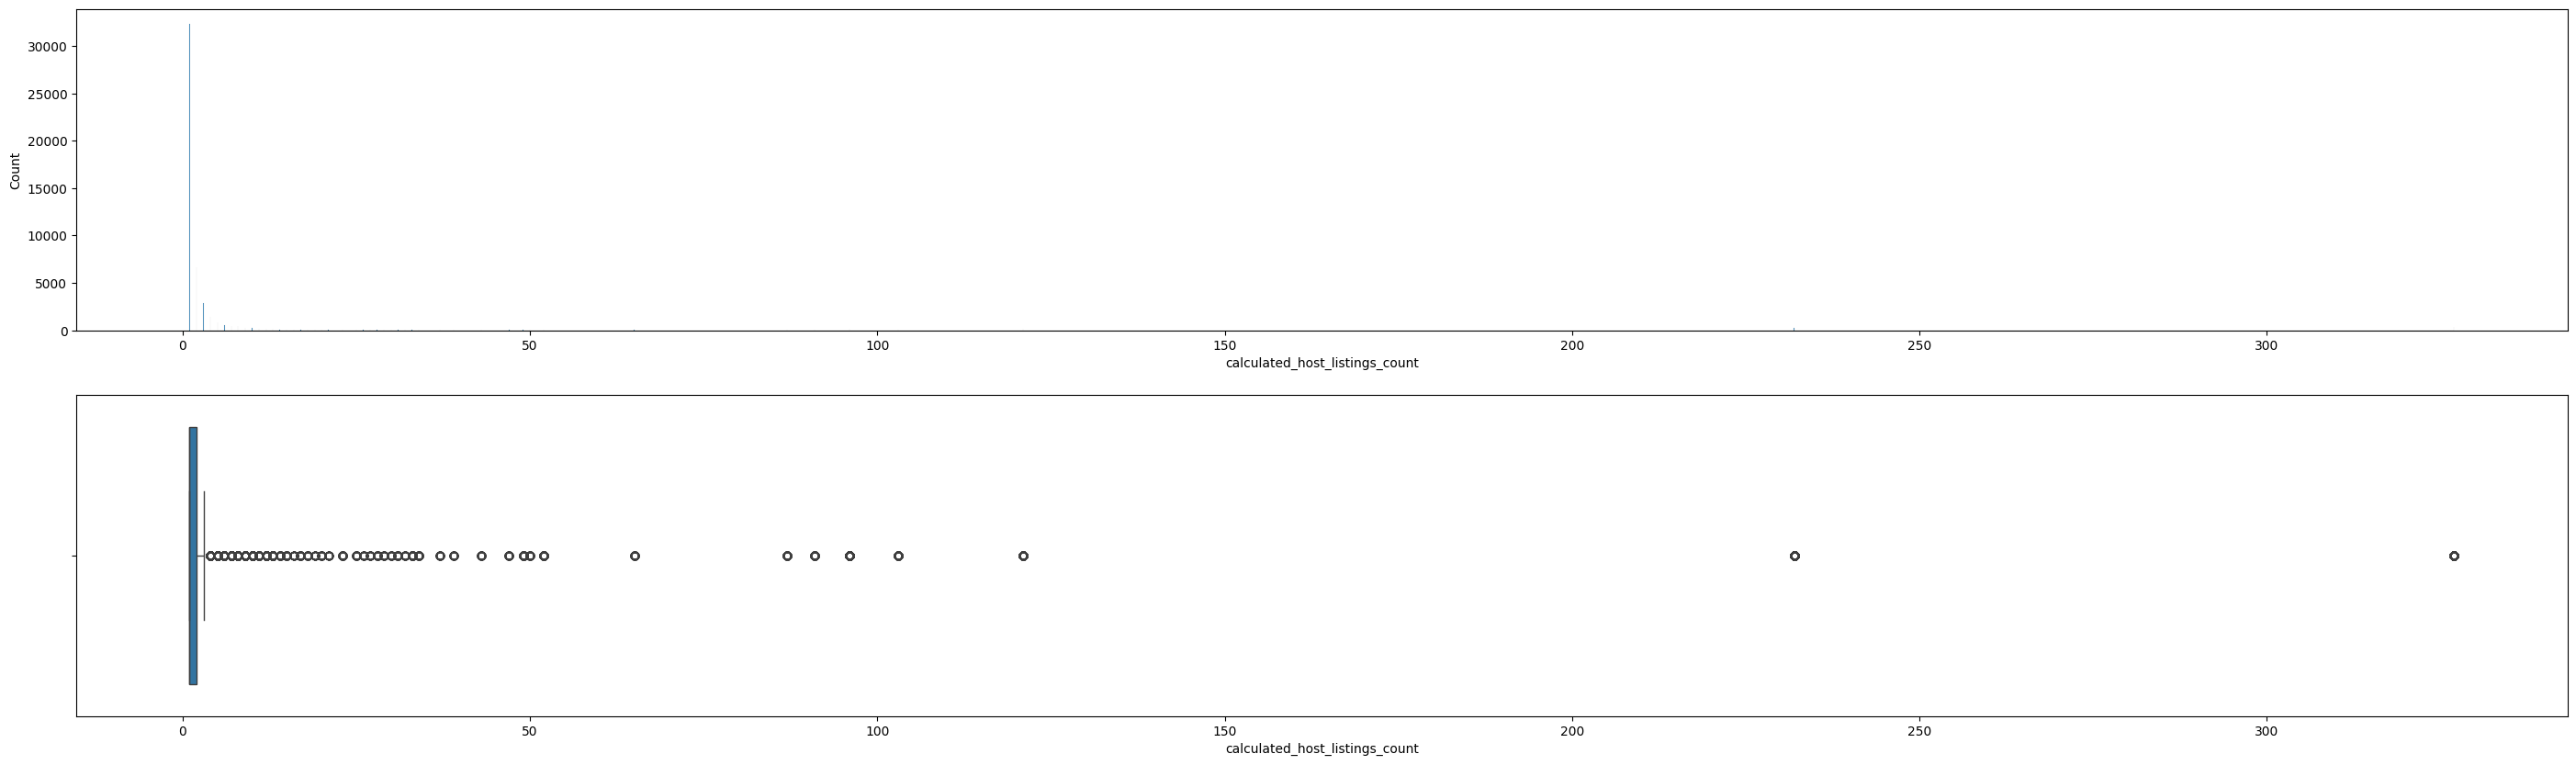

In [12]:
fig, axis = plt.subplots(2, 1, figsize = (35, 10))

sns.histplot(total_data, x = "calculated_host_listings_count", ax = axis[0])
sns.boxplot(total_data, x = "calculated_host_listings_count", ax = axis[1])

In [32]:
total_data['y_n'].value_counts()

y_n
0    36548
1     4640
Name: count, dtype: int64

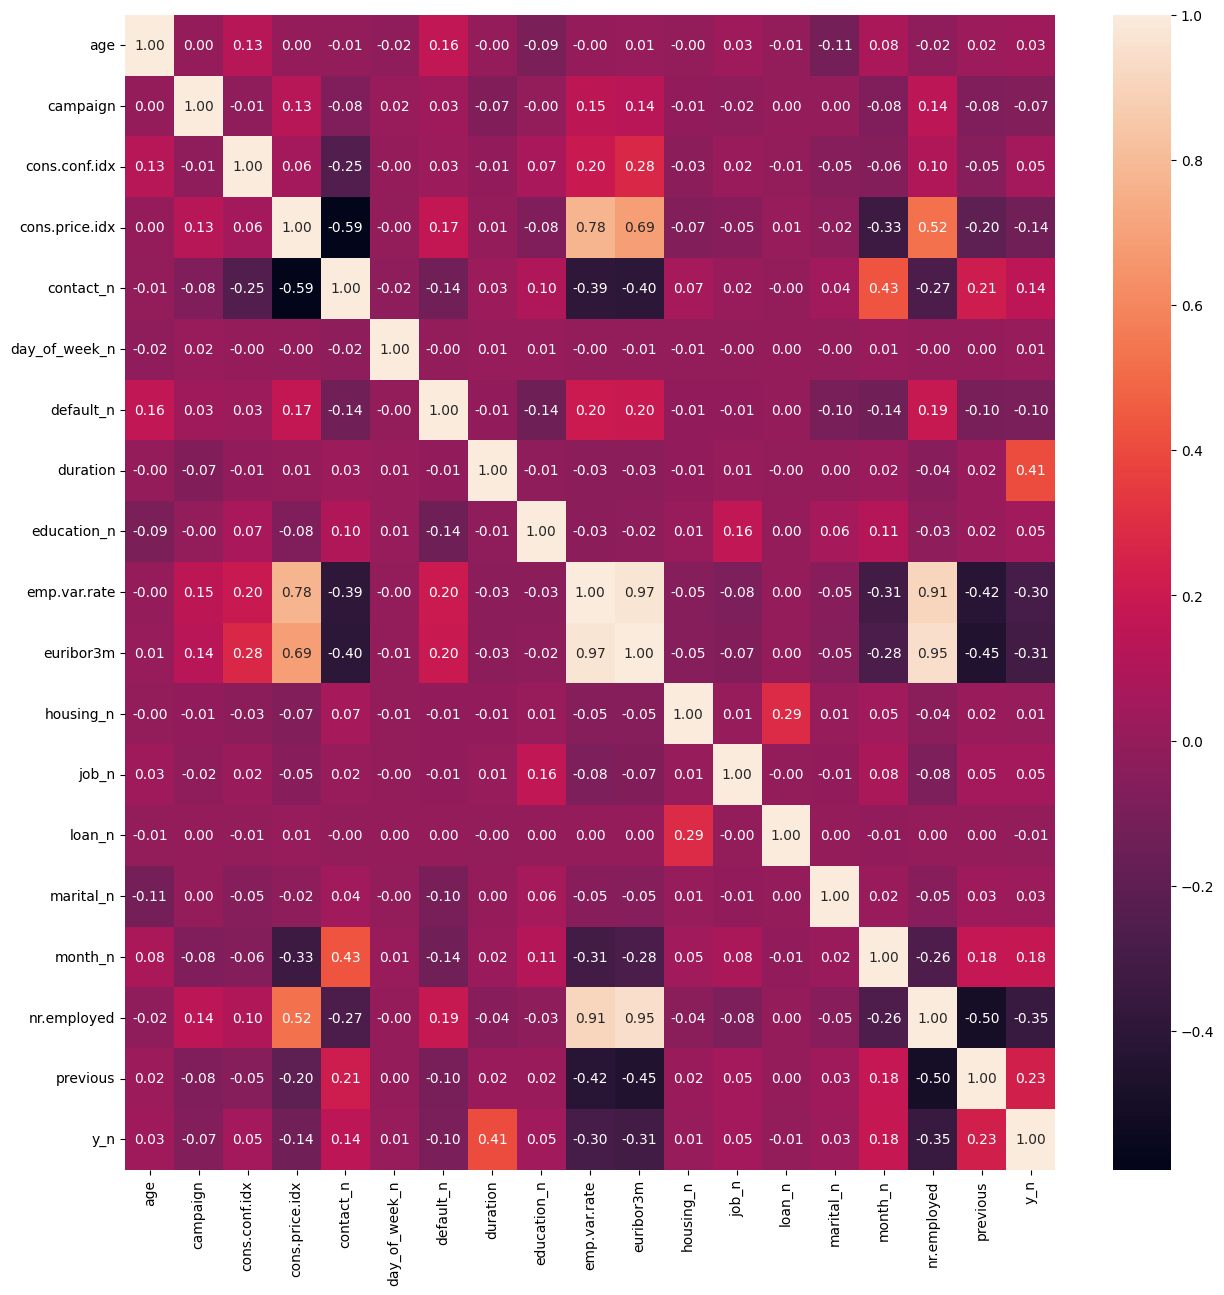

In [27]:
fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(total_data[total_data.columns.difference(["job","marital","education","default","housing","loan","contact","month","day_of_week","y"])].corr(), annot = True, fmt = ".2f")

plt.show()

In [28]:
clean_total_data = total_data

### DAY 2
#### Outlayers
##### Reemplazar





Reemplazo las que tienen contenidos fuera de sus medias y les meto la moda para que no afecten 

In [31]:
descr_price = total_data.y_n.describe()
descr_price

count    41188.000000
mean         0.112654
std          0.316173
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y_n, dtype: float64

In [15]:
price_iqr = descr_price["75%"]-descr_price["25%"]
uper_l = descr_price["75%"]
lower_l = descr_price["25%"]


##### Mantener

In [32]:
total_data.isnull().sum()
total_data = total_data()



TypeError: 'DataFrame' object is not callable

In [33]:
from sklearn.model_selection import train_test_split

predictoras = total_data.columns.difference(["job","marital","education","default","housing","loan","contact","month","day_of_week","y"])
target = 'y_n'

X = total_data[predictoras]
y = total_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train

,age,age_n,campaign,campaign_n,cons.conf.idx,cons.conf.idx_n,cons.price.idx,cons.price.idx_n,contact_n,day_of_week_n,...,housing_n,job_n,loan_n,marital_n,month_n,nr.employed,nr.employed_n,previous,previous_n,y_n
39075,29,9.0,3,2.0,-33.0,16.0,92.713,16.0,1.0,0.0,...,0.0,2.0,0.0,0.0,6.0,5023.5,7.0,1,1.0,0.0
34855,29,9.0,4,3.0,-46.2,9.0,92.893,9.0,0.0,4.0,...,0.0,4.0,0.0,1.0,0.0,5099.1,4.0,0,0.0,0.0
7107,45,4.0,2,1.0,-36.4,0.0,93.994,0.0,0.0,3.0,...,1.0,3.0,0.0,0.0,0.0,5191.0,0.0,0,0.0,0.0
31614,34,18.0,1,0.0,-46.2,9.0,92.893,9.0,1.0,3.0,...,0.0,1.0,0.0,0.0,0.0,5099.1,4.0,1,1.0,0.0
34878,32,21.0,9,8.0,-46.2,9.0,92.893,9.0,1.0,4.0,...,0.0,2.0,0.0,1.0,0.0,5099.1,4.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,20.0,2,1.0,-36.4,0.0,93.994,0.0,0.0,1.0,...,0.0,5.0,0.0,0.0,0.0,5191.0,0.0,0,0.0,0.0
11284,37,2.0,1,0.0,-41.8,1.0,94.465,1.0,0.0,3.0,...,0.0,6.0,0.0,0.0,1.0,5228.1,1.0,0,0.0,0.0
38158,35,10.0,1,0.0,-26.9,14.0,92.431,14.0,1.0,3.0,...,1.0,2.0,0.0,0.0,4.0,5017.5,6.0,1,1.0,1.0
860,40,3.0,2,1.0,-36.4,0.0,93.994,0.0,0.0,2.0,...,1.0,6.0,0.0,0.0,0.0,5191.0,0.0,0,0.0,0.0


### Day 3

mutual_info_classif en lugar de el anove si las variables son categoricas.